In [ ]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set(color_codes=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, zero_one_loss, hamming_loss
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memuat data dari URL menggunakan metode read_csv dari pandas
df_wine = pd.read_csv('/content/drive/MyDrive/pycodes/029/Wine.csv')
df_wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Karena judul kolom tidak benar, berikan koreksi ke variabel untuk penggunaan lebih lanjut
column_headers = ['Kelas', 'Alkohol', 'Asam Malat', 'Abu', 'Alkilinitas abu',
                   'Magnesium', 'Total fenol', 'Flavanoid',
                   'Nonflavanoid phenol', 'Proantosianidin',
                   'Intensitas Warna', 'Hue', 'OD280/OD315 dari Wine yang Diencerkan',
                   'Proline']

In [ ]:
# Update data with corrected headers using previously defined variable
df_wine = pd.read_csv('/content/drive/MyDrive/pycodes/029/Wine.csv', header=None, names=column_headers)
df_wine

,Kelas,Alkohol,Asam Malat,Abu,Alkilinitas abu,Magnesium,Total fenol,Flavanoid,Nonflavanoid phenol,Proantosianidin,Intensitas Warna,Hue,OD280/OD315 dari Wine yang Diencerkan,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Check for blank values
df_wine.isnull().sum()

Kelas                                    0
Alkohol                                  0
Asam Malat                               0
Abu                                      0
Alkilinitas abu                          0
Magnesium                                0
Total fenol                              0
Flavanoid                                0
Nonflavanoid phenol                      0
Proantosianidin                          0
Intensitas Warna                         0
Hue                                      0
OD280/OD315 dari Wine yang Diencerkan    0
Proline                                  0
dtype: int64

In [ ]:
df_wine.describe()

,Kelas,Alkohol,Asam Malat,Abu,Alkilinitas abu,Magnesium,Total fenol,Flavanoid,Nonflavanoid phenol,Proantosianidin,Intensitas Warna,Hue,OD280/OD315 dari Wine yang Diencerkan,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df_wine.groupby('Kelas')['Kelas'].count()

Kelas
1    59
2    71
3    48
Name: Kelas, dtype: int64

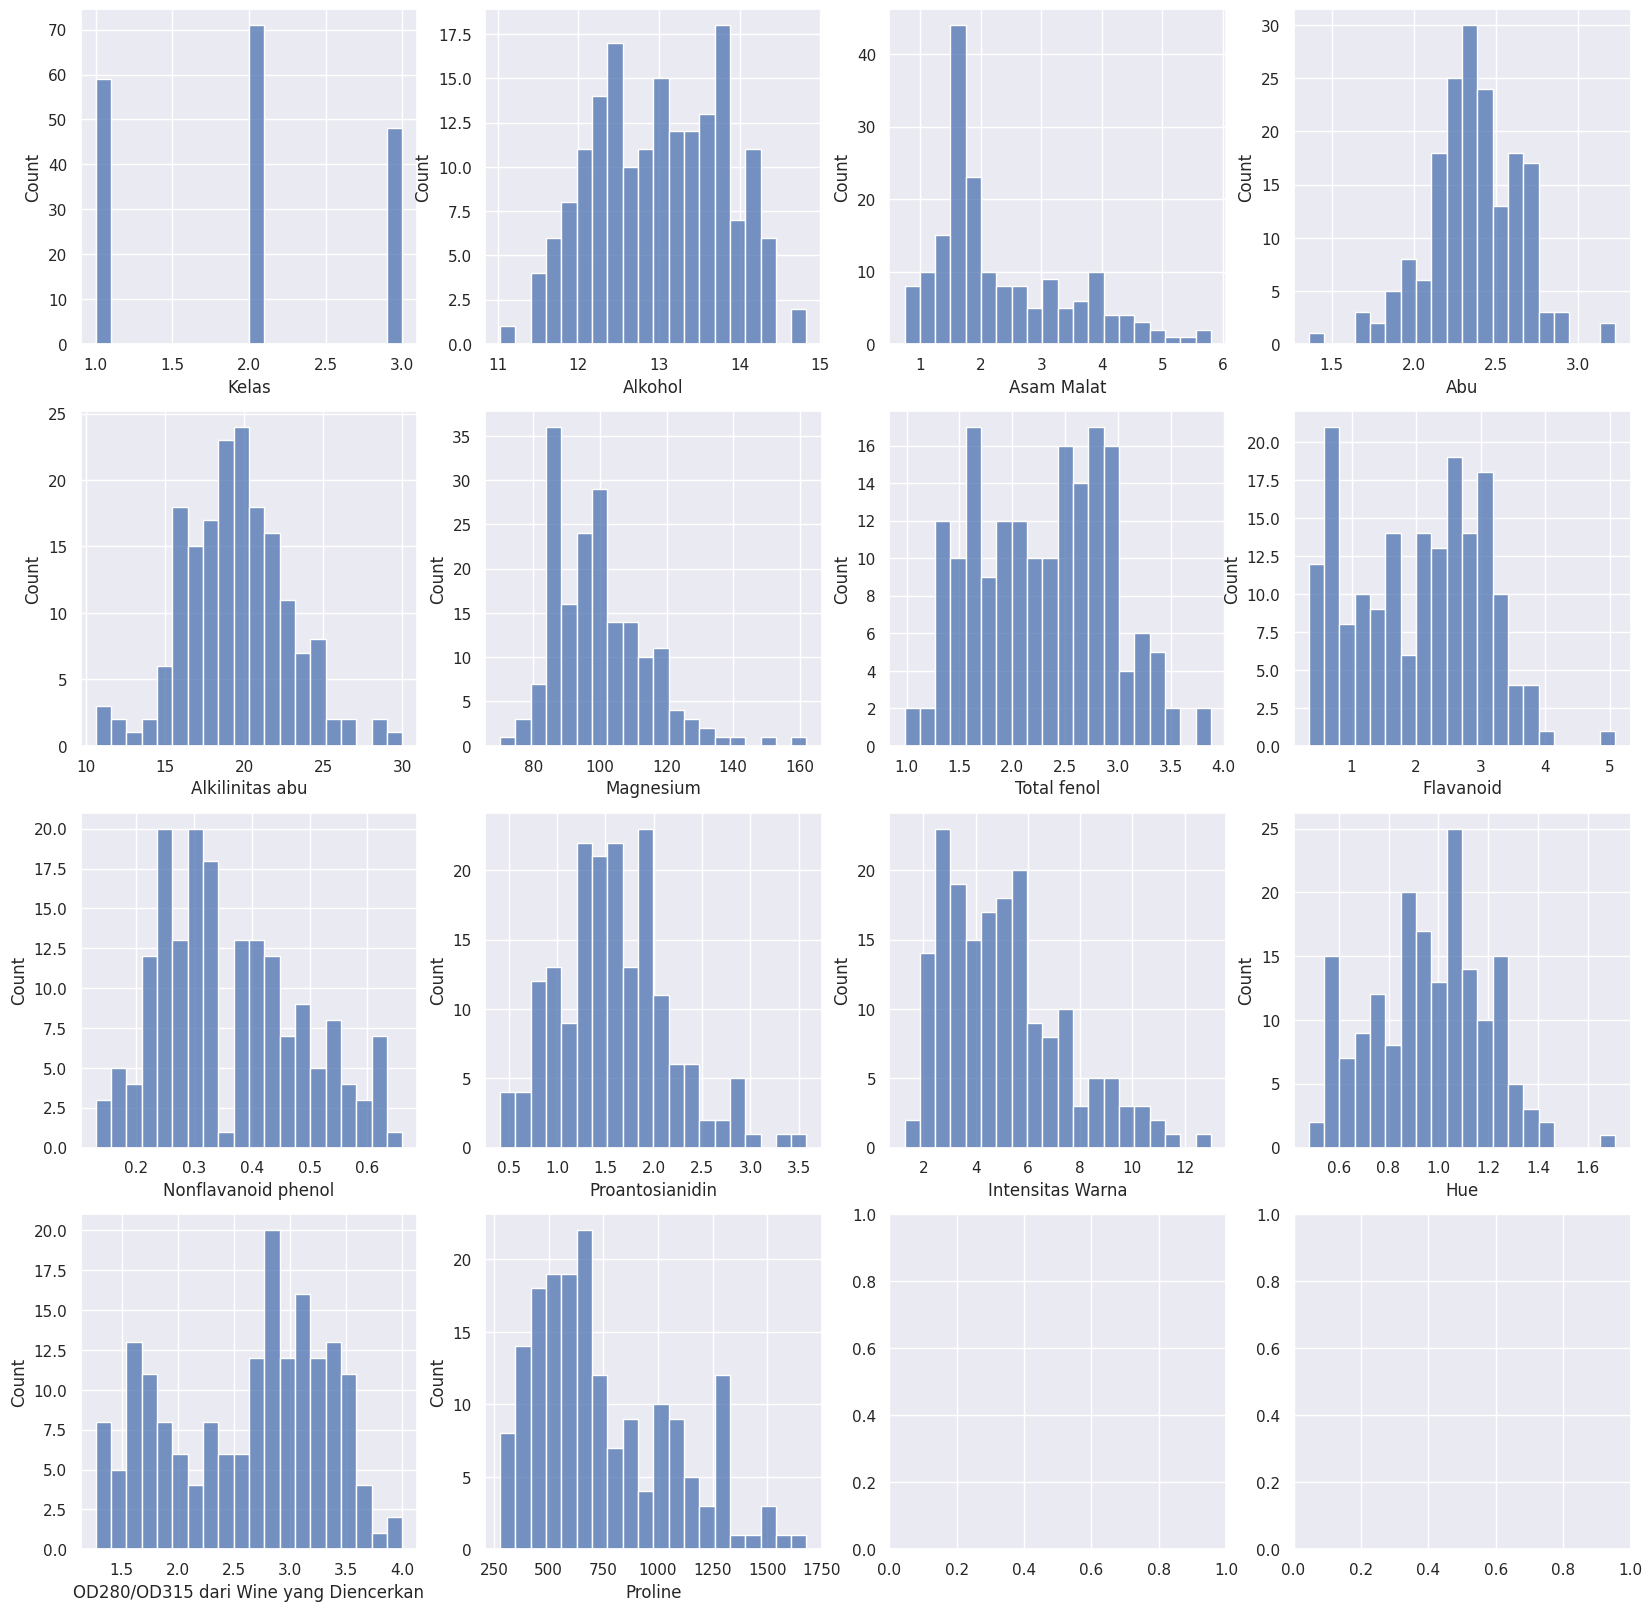

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for vars in df_wine.columns :
    sns.histplot(data = df_wine, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

In [ ]:
Kelas_1 = list()
Kelas_2 = list()
Kelas_3 = list()
for row in df_wine.values :
    if row[0] == 1:
        Kelas_1.append(row)
    elif row[0] == 2:
        Kelas_2.append(row)
    else :
        Kelas_3.append(row)
df_Kelas_1 = pd.DataFrame(Kelas_1, columns = df_wine.columns)
df_Kelas_2 = pd.DataFrame(Kelas_2, columns = df_wine.columns)
df_Kelas_3 = pd.DataFrame(Kelas_3, columns = df_wine.columns)

In [ ]:
del df_Kelas_1['Kelas']
del df_Kelas_2['Kelas']
del df_Kelas_3['Kelas']

In [ ]:
means = list()

In [ ]:
means.append(df_Kelas_1.mean())
means.append(df_Kelas_2.mean())
means.append(df_Kelas_3.mean())

In [ ]:
df_means = pd.DataFrame(means, columns = df_Kelas_1.columns,
                        index = range(1,4))
df_means

,Alkohol,Asam Malat,Abu,Alkilinitas abu,Magnesium,Total fenol,Flavanoid,Nonflavanoid phenol,Proantosianidin,Intensitas Warna,Hue,OD280/OD315 dari Wine yang Diencerkan,Proline
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [ ]:
medians = list()
medians.append(df_Kelas_1.median())
medians.append(df_Kelas_2.median())
medians.append(df_Kelas_3.median())

In [ ]:
df_medians = pd.DataFrame(medians, columns = df_Kelas_1.columns,
                        index = range(1,4))
df_medians

,Alkohol,Asam Malat,Abu,Alkilinitas abu,Magnesium,Total fenol,Flavanoid,Nonflavanoid phenol,Proantosianidin,Intensitas Warna,Hue,OD280/OD315 dari Wine yang Diencerkan,Proline
1,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
2,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
3,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


Text(0.5, 1.0, 'Alkohol Dist')

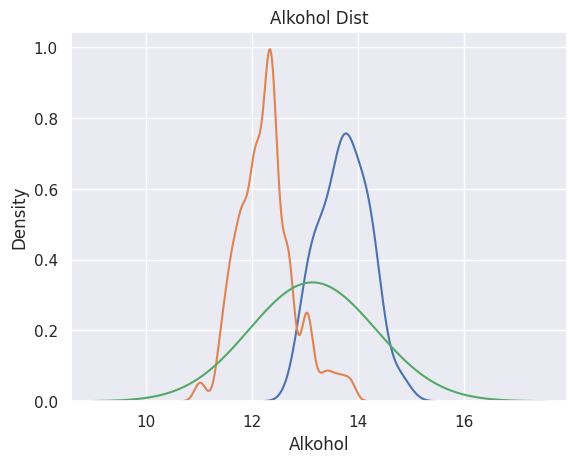

In [ ]:
sns.kdeplot(df_Kelas_1['Alkohol'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Alkohol'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Alkohol'], bw=2, label='Kelas_3').set_title('Alkohol Dist')

In [ ]:
print('Mean')
print(df_means['Alkohol'].values)
print('Median')
print(df_medians['Alkohol'].values)

Mean
[13.74474576 12.27873239 13.15375   ]
Median
[13.75  12.29  13.165]


Text(0.5, 1.0, 'Asam Malat Dist')

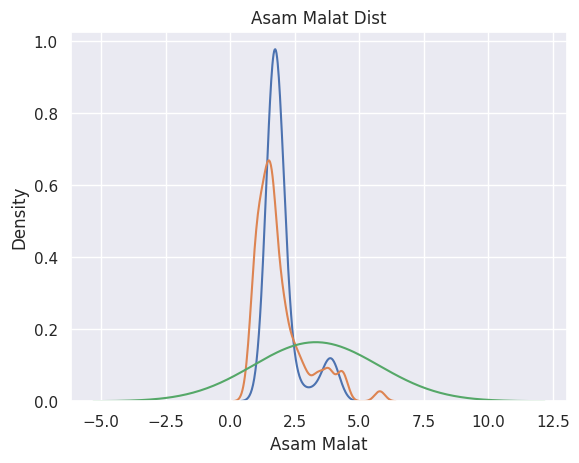

In [ ]:
sns.kdeplot(df_Kelas_1['Asam Malat'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Asam Malat'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Asam Malat'], bw=2, label='Kelas_3').set_title('Asam Malat Dist')

In [ ]:
print('Mean')
print(df_means['Asam Malat'].values)
print('Median')
print(df_medians['Asam Malat'].values)

Mean
[2.01067797 1.93267606 3.33375   ]
Median
[1.77  1.61  3.265]


Text(0.5, 1.0, 'Abu Dist')

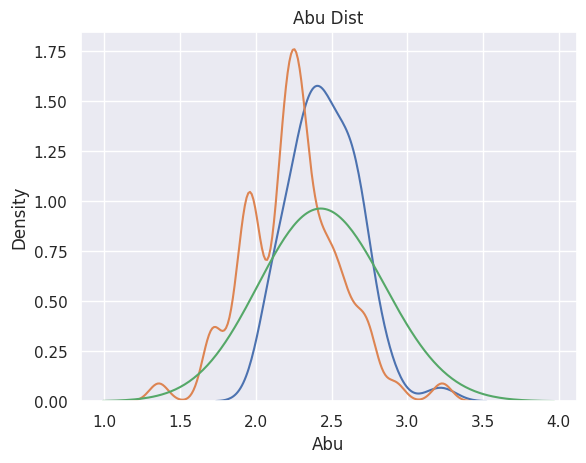

In [ ]:
sns.kdeplot(df_Kelas_1['Abu'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Abu'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Abu'], bw=2, label='Kelas_3').set_title('Abu Dist')

In [ ]:
print('Mean')
print(df_means['Abu'].values)
print('Median')
print(df_medians['Abu'].values)

Mean
[2.45559322 2.24478873 2.43708333]
Median
[2.44 2.24 2.38]


Text(0.5, 1.0, 'Alkilinitas abu Dist')

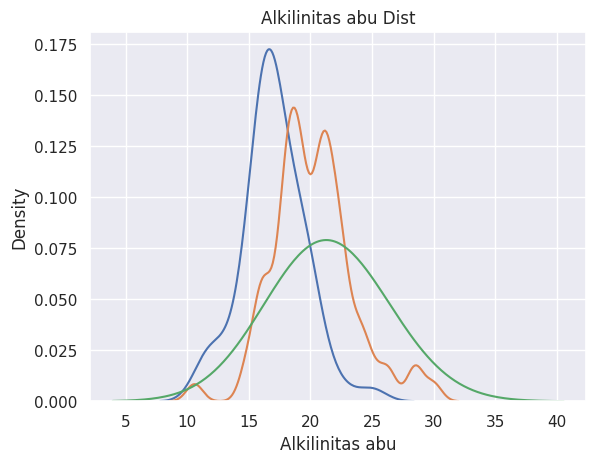

In [ ]:
sns.kdeplot(df_Kelas_1['Alkilinitas abu'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Alkilinitas abu'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Alkilinitas abu'], bw=2, label='Kelas_3').set_title('Alkilinitas abu Dist')

In [ ]:
print('Mean')
print(df_means['Alkilinitas abu'].values)
print('Median')
print(df_medians['Alkilinitas abu'].values)

Mean
[17.03728814 20.23802817 21.41666667]
Median
[16.8 20.  21. ]


Text(0.5, 1.0, 'Magnesium Dist')

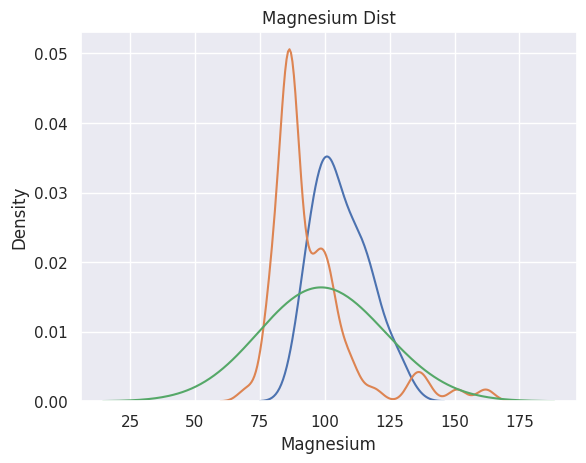

In [ ]:
sns.kdeplot(df_Kelas_1['Magnesium'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Magnesium'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Magnesium'], bw=2, label='Kelas_3').set_title('Magnesium Dist')

In [ ]:
print('Mean')
print(df_means['Magnesium'].values)
print('Median')
print(df_medians['Magnesium'].values)

Mean
[106.33898305  94.54929577  99.3125    ]
Median
[104.  88.  97.]


Text(0.5, 1.0, 'Total fenol Dist')

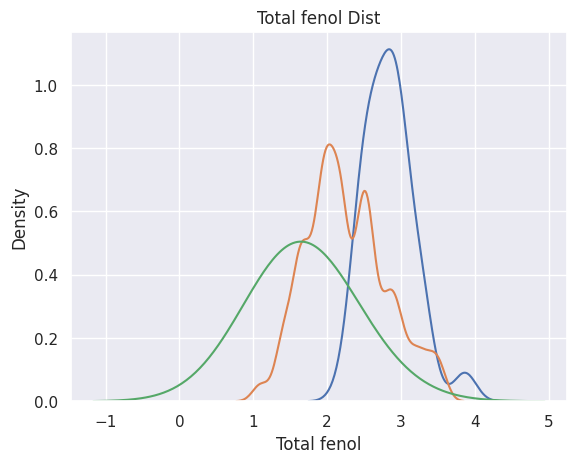

In [ ]:
sns.kdeplot(df_Kelas_1['Total fenol'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Total fenol'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Total fenol'], bw=2, label='Kelas_3').set_title('Total fenol Dist')

In [ ]:
print('Mean')
print(df_means['Total fenol'].values)
print('Median')
print(df_medians['Total fenol'].values)

Mean
[2.84016949 2.25887324 1.67875   ]
Median
[2.8   2.2   1.635]


Text(0.5, 1.0, 'Flavanoid Dist')

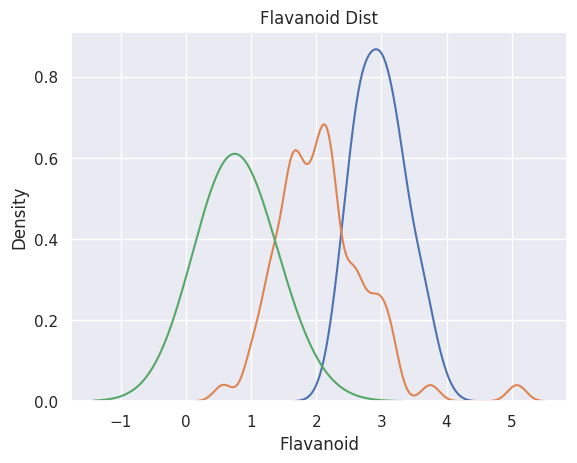

In [ ]:
sns.kdeplot(df_Kelas_1['Flavanoid'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Flavanoid'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Flavanoid'], bw=2, label='Kelas_3').set_title('Flavanoid Dist')

In [ ]:
print('Mean')
print(df_means['Flavanoid'].values)
print('Median')
print(df_medians['Flavanoid'].values)

Mean
[2.98237288 2.08084507 0.78145833]
Median
[2.98  2.03  0.685]


Text(0.5, 1.0, 'Nonflavanoid phenol Dist')

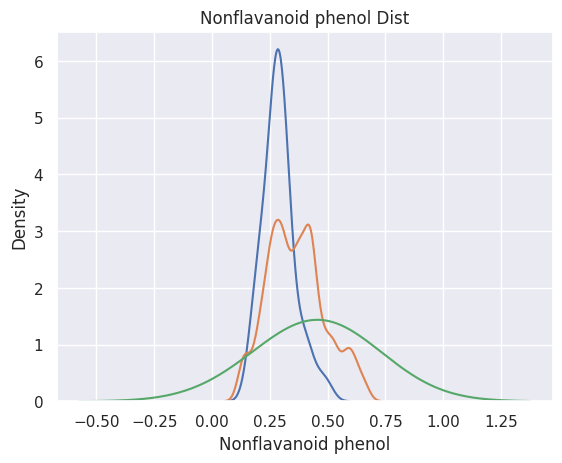

In [ ]:
sns.kdeplot(df_Kelas_1['Nonflavanoid phenol'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Nonflavanoid phenol'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Nonflavanoid phenol'], bw=2, label='Kelas_3').set_title('Nonflavanoid phenol Dist')

In [ ]:
print('Mean')
print(df_means['Nonflavanoid phenol'].values)
print('Median')
print(df_medians['Nonflavanoid phenol'].values)

Mean
[0.29       0.36366197 0.4475    ]
Median
[0.29 0.37 0.47]


Text(0.5, 1.0, 'Proantosianidin Dist')

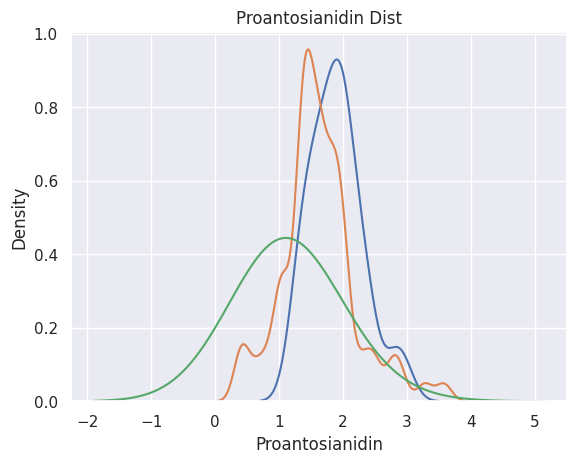

In [ ]:
sns.kdeplot(df_Kelas_1['Proantosianidin'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Proantosianidin'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Proantosianidin'], bw=2, label='Kelas_3').set_title('Proantosianidin Dist')

In [ ]:
print('Mean')
print(df_means['Proantosianidin'].values)
print('Median')
print(df_medians['Proantosianidin'].values)

Mean
[1.89932203 1.63028169 1.15354167]
Median
[1.87  1.61  1.105]


Text(0.5, 1.0, 'Intensitas Warna Dist')

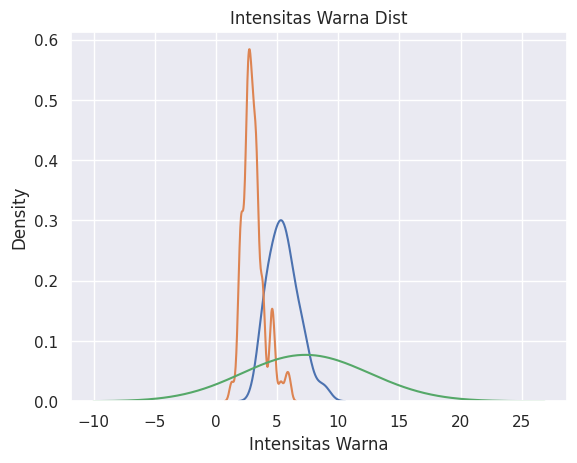

In [ ]:
sns.kdeplot(df_Kelas_1['Intensitas Warna'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Intensitas Warna'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Intensitas Warna'], bw=2, label='Kelas_3').set_title('Intensitas Warna Dist')

In [ ]:
print('Mean')
print(df_means['Intensitas Warna'].values)
print('Median')
print(df_medians['Intensitas Warna'].values)

Mean
[5.52830508 3.08661972 7.39624998]
Median
[5.4  2.9  7.55]


Text(0.5, 1.0, 'Hue Dist')

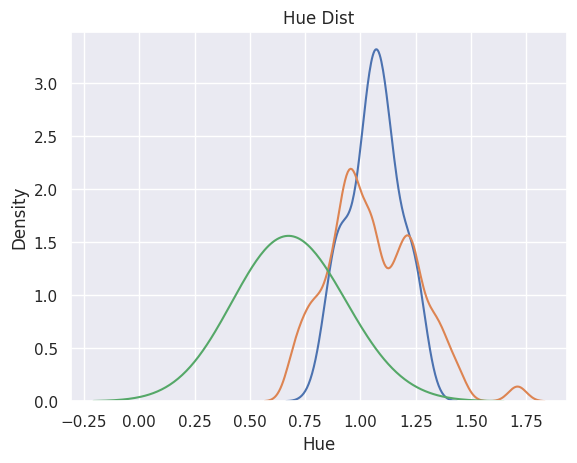

In [ ]:
sns.kdeplot(df_Kelas_1['Hue'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Hue'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Hue'], bw=2, label='Kelas_3').set_title('Hue Dist')

In [ ]:
print('Mean')
print(df_means['Hue'].values)
print('Median')
print(df_medians['Hue'].values)

Mean
[1.0620339  1.05628169 0.68270833]
Median
[1.07  1.04  0.665]


Text(0.5, 1.0, 'OD280/OD315 dari Wine yang Diencerkan Dist')

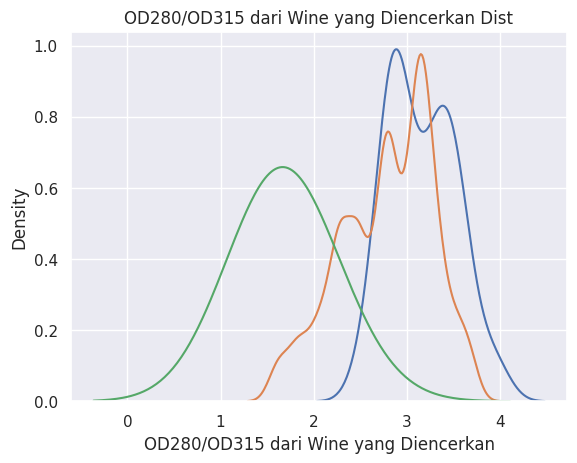

In [ ]:
sns.kdeplot(df_Kelas_1['OD280/OD315 dari Wine yang Diencerkan'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['OD280/OD315 dari Wine yang Diencerkan'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['OD280/OD315 dari Wine yang Diencerkan'], bw=2, label='Kelas_3').set_title('OD280/OD315 dari Wine yang Diencerkan Dist')

In [ ]:
print('Mean')
print(df_means['OD280/OD315 dari Wine yang Diencerkan'].values)
print('Median')
print(df_medians['OD280/OD315 dari Wine yang Diencerkan'].values)

Mean
[3.15779661 2.78535211 1.68354167]
Median
[3.17 2.83 1.66]


Text(0.5, 1.0, 'Proline Dist')

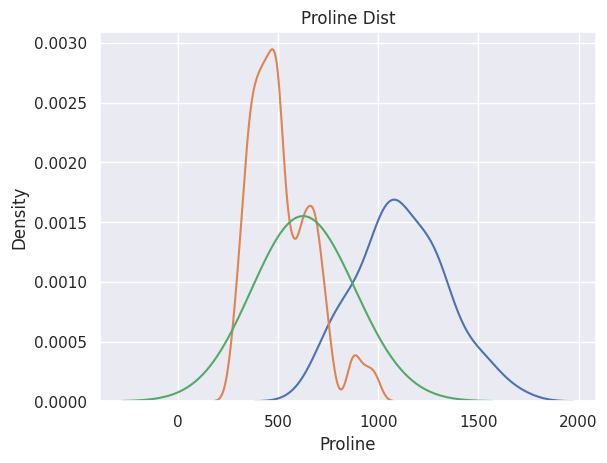

In [ ]:
sns.kdeplot(df_Kelas_1['Proline'], label = 'Kelas_1')
sns.kdeplot(df_Kelas_2['Proline'], bw=.2, label='Kelas_2')
sns.kdeplot(df_Kelas_3['Proline'], bw=2, label='Kelas_3').set_title('Proline Dist')

In [ ]:
print('Mean')
print(df_means['Proline'].values)
print('Median')
print(df_medians['Proline'].values)

Mean
[1115.71186441  519.50704225  629.89583333]
Median
[1095.   495.   627.5]


In [ ]:
df_wine = df_wine[df_wine['Kelas'] != 1]  # Menghapus kelas 1
y = df_wine['Kelas'].values
X = df_wine.drop(['Kelas'], axis=1).values
# Mengkodekan data dan membaginya
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Impor library
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Fungsi bantu
def hitung_error(y, y_pred, w_i):
    '''
    Menghitung tingkat kesalahan dari klasifier lemah m. Argumen:
    y: nilai target aktual
    y_pred: nilai yang diprediksi oleh klasifier lemah
    w_i: bobot individu untuk setiap observasi

    Catatan bahwa semua array harus memiliki panjang yang sama
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int))) / sum(w_i)

def hitung_alpha(error):
    '''
    Menghitung bobot dari klasifier lemah m dalam mayoritas suara dari klasifier final. Ini disebut
    alpha di bab 10.1 dari The Elements of Statistical Learning. Argumen:
    error: tingkat kesalahan dari klasifier lemah m
    '''
    return np.log((1 - error) / error)

def perbarui_bobot(w_i, alpha, y, y_pred):
    '''
    Memperbarui bobot individu w_i setelah iterasi boosting. Argumen:
    w_i: bobot individu untuk setiap observasi
    y: nilai target aktual
    y_pred: nilai yang diprediksi oleh klasifier lemah
    alpha: bobot dari klasifier lemah yang digunakan untuk memperkirakan y_pred
    '''
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

# Tentukan kelas AdaBoost
class AdaBoost:

    def __init__(self):
        # self.w_i = None
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M=100):
        '''
        Melatih model. Argumen:
        X: variabel independen
        y: variabel target
        M: jumlah putaran boosting. Default adalah 100
        '''

        # Bersihkan sebelum memanggil
        self.alphas = []
        self.training_errors = []
        self.M = M

        # Iterasi di atas M klasifier lemah
        for m in range(0, M):

            # Tetapkan bobot untuk iterasi boosting saat ini
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # Pada m = 0, bobot semua sama dan sama dengan 1 / N
            else:
                w_i = perbarui_bobot(w_i, alpha_m, y, y_pred)

            # (a) Latih klasifier lemah dan prediksi label
            G_m = DecisionTreeClassifier(max_depth=1)     # Stump: Pohon klasifikasi dengan dua simpul terminal
            G_m.fit(X, y, sample_weight=w_i)
            y_pred = G_m.predict(X)

            self.G_M.append(G_m) # Simpan ke daftar klasifier lemah

            # (b) Hitung kesalahan
            error_m = hitung_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Hitung alpha
            alpha_m = hitung_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)


    def predict(self, X):
        '''
        Memprediksi dengan menggunakan model yang sudah dilatih. Argumen:
        X: variabel independen
        '''

        # Inisialisasi dataframe dengan prediksi lemah untuk setiap observasi
        weak_preds = pd.DataFrame(index=range(len(X)), columns=range(self.M))

        # Prediksi label kelas untuk setiap klasifier lemah, ditimbang dengan alpha_m
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:, m] = y_pred_m

        # Perkirakan prediksi akhir
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

    def error_rates(self, X, y):
        '''
        Dapatkan tingkat kesalahan dari setiap klasifier lemah. Argumen:
        X: variabel independen
        y: variabel target yang terkait dengan X
        '''

        self.prediction_errors = [] # Bersihkan sebelum memanggil

        # Prediksi label kelas untuk setiap klasifier lemah
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X)
            error_m = hitung_error(y=y, y_pred=y_pred_m, w_i=np.ones(len(y)))
            self.prediction_errors.append(error_m)


In [ ]:
# Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

In [ ]:
# Melakukan prediksi pada set data uji
from sklearn.metrics import roc_auc_score
y_pred = ab.predict(X_test)
print('Skor ROC-AUC dari model adalah:', round(roc_auc_score(y_test, y_pred), 4))

Skor ROC-AUC dari model adalah: 1.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_sk = AdaBoostClassifier(n_estimators=400)  # Jumlah putaran boosting (M) yang sama dengan model kita
ab_sk.fit(X_train, y_train)
y_pred_sk = ab_sk.predict(X_test)
print('Skor ROC-AUC dari model adalah:', round(roc_auc_score(y_test, y_pred_sk), 4))

Skor ROC-AUC dari model adalah: 1.0


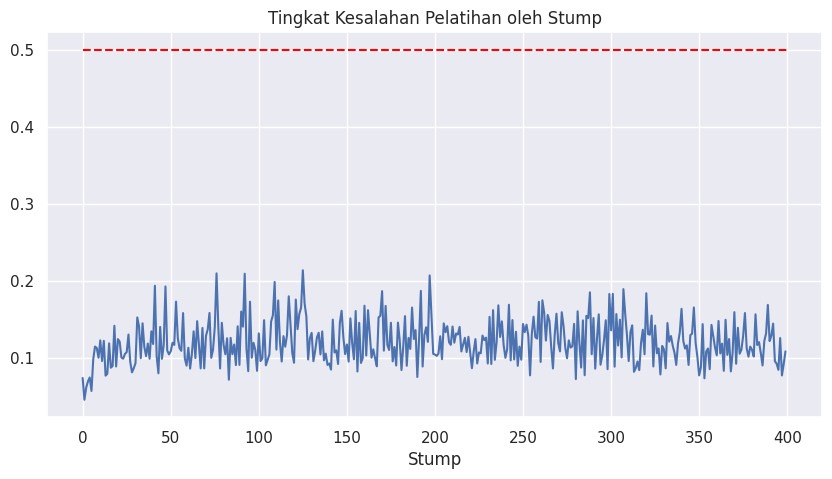

In [ ]:
# Tingkat kesalahan selama pelatihan
plt.figure(figsize=(10, 5))
plt.plot(ab.training_errors)
plt.hlines(0.5, 0, 400, colors='red', linestyles='dashed')
plt.title('Tingkat Kesalahan Pelatihan oleh Stump')
plt.xlabel('Stump')
plt.show()


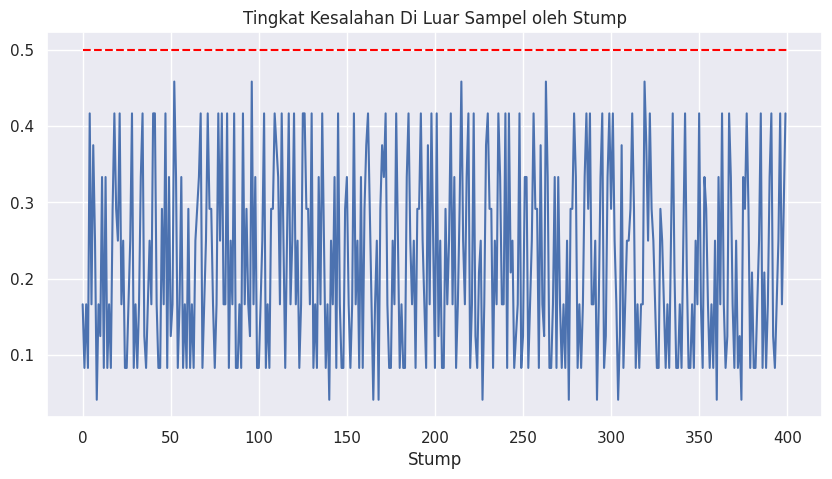

In [ ]:
# Tingkat kesalahan di luar sampel
ab.error_rates(X_test, y_test)
plt.figure(figsize=(10, 5))
plt.plot(ab.prediction_errors)
plt.hlines(0.5, 0, 400, colors='red', linestyles='dashed')
plt.title('Tingkat Kesalahan Di Luar Sampel oleh Stump')
plt.xlabel('Stump')
plt.show()

In [ ]:
def hitung_kesalahan(y, y_pred, w_i):
    '''
    Menghitung tingkat kesalahan dari klasifier lemah m. Argumen:
    y: nilai target aktual
    y_pred: nilai yang diprediksi oleh klasifier lemah
    w_i: bobot individu untuk setiap observasi


    Perhatikan bahwa semua array harus memiliki panjang yang sama
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int))) / sum(w_i)

print('Tingkat kesalahan dari metaklasifier:', round(hitung_kesalahan(y_test, y_pred, np.ones(len(y_test))), 4))

Tingkat kesalahan dari metaklasifier: 0.0
